In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold

In [3]:
train_df = pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
train_df.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [8]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=2021)

train_df['fold'] = -1
folds = train_df.fold.values
for fold, (train_index, test_index) in enumerate(skf.split(train_df.index.values, train_df.MGMT_value.values)):
    folds[test_index] = fold

train_df['fold'] = folds
train_df.head()

,BraTS21ID,MGMT_value,fold
0,0,1,2
1,2,1,2
2,3,0,1
3,5,1,2
4,6,1,0


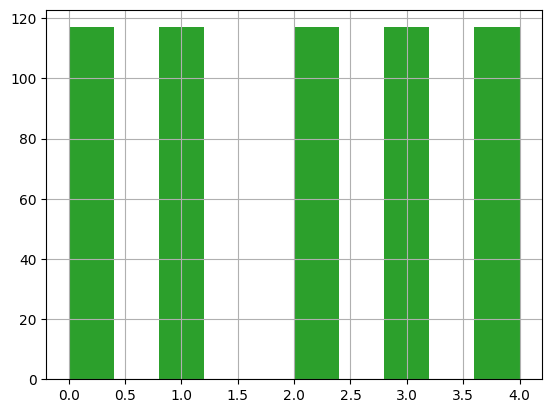

In [14]:
train_df.fold.hist()
plt.show()

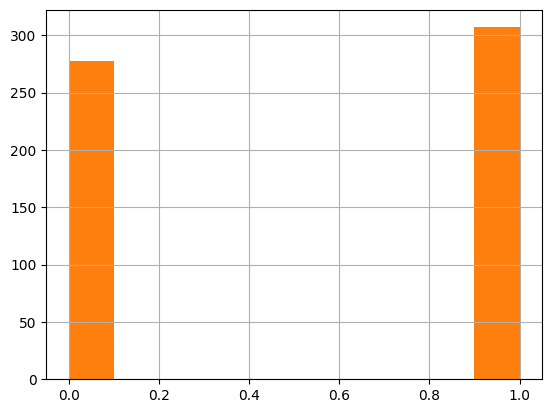

In [16]:
train_df.MGMT_value.hist()
plt.show()

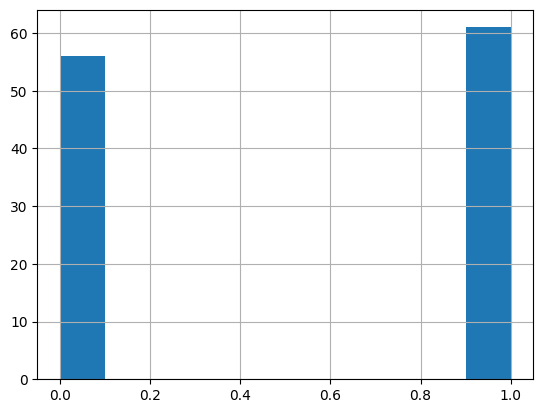

In [18]:
train_df[train_df.fold==2].MGMT_value.hist()
plt.show()

In [19]:
train_df.to_csv('../input/train_labels_folds-v1.csv',index=False)

In [20]:
pd.read_csv('../input/train_labels_folds-v1.csv').head()

,BraTS21ID,MGMT_value,fold
0,0,1,2
1,2,1,2
2,3,0,1
3,5,1,2
4,6,1,0
